In [2]:
import cv2
from scipy import ndimage
import numpy as np

from glob import glob

import matplotlib.pyplot as plt

In [3]:

def computeMexHatKernel(radius = 5):
    sz = 2 * radius + 1
    #  this formula recreates the kernel from the ImageJ Mexican hat plugin, which drops in some magic numbers without explanation, and
    #  due to a coding mistake only adds 1.0/6.0 in the 3rd factor, but not in
    #  the second. the intended formula is probably
    #  sigma2 = 2*(r/3.0+1.0/6.0)*(r/3.0 +1.0/6.0);

    mexHatKernel = np.zeros((sz, sz))
    sigma2 = 2 * (radius / 3.0 + 1.0 / 6.0) * (radius / 3.0 + 1.0 / 6.0)
    PIs = 0.024444693984887; #4.0/sqrt(pi()*sigma2)/sigma2/sigma2;
    sumOfKernel = 0
    x2 = 0
    idx_x = 0
    idx_y = 0
    for u in range(-radius, radius): #u = -r:1:r
    
        for w in range(-radius, radius): #for w = -r:1:r
        
            x2 = u * u + w * w
            idx_x = u + radius
            idx_y = w + radius
            mexHatKernel[idx_x, idx_y] = -((x2 - sigma2) * np.exp(-x2 / sigma2) * PIs)
            #                  kernel(idx+1) = single((x2 -sigma2)*exp(-x2/sigma2))
            #             /System.out.print(kernel(c) +" ");
            sumOfKernel = sumOfKernel + mexHatKernel[idx_x, idx_y]
        
    

    sumOfKernel = abs(sumOfKernel)
    if (sumOfKernel < 1e-5):
        sumOfKernel = 1

    if (sumOfKernel != 1):
        mexHatKernel = mexHatKernel / sumOfKernel

    return mexHatKernel


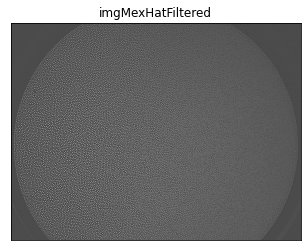

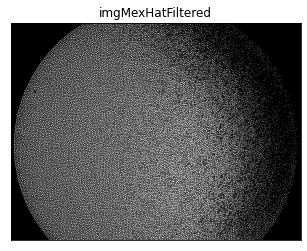

In [4]:

# path = "C:/Users/Matthew Eadie/OneDrive - University of Dundee/PhD/PhD Phase 1/MFAE Paper/sensors third times the charm"
# dataset = "11-59-00"

#src = cv2.imread(f'{path}/{dataset}/2023-02-08_11-59-00_00090.tif',0)
lightfield = cv2.imread('./test images/_Dominic test images/Calibration Data/Exposure_25ms/2018-02-27_14-11-46_Light_Background_Blue.tif',0)

mexHatKernel = computeMexHatKernel()


anchor = (-1, -1)
delta = 0
ddepth = -1

imgMexHatFiltered = cv2.filter2D(lightfield, ddepth, mexHatKernel)

ret, imgMexHatBinarized = cv2.threshold(imgMexHatFiltered, 20, 255, cv2.THRESH_BINARY)

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(imgMexHatFiltered*5,cmap='gray')
plt.title('imgMexHatFiltered')
plt.show()

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(imgMexHatBinarized,cmap='gray')
plt.title('imgMexHatFiltered')
plt.show()


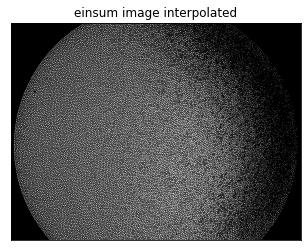

In [5]:
src = cv2.imread('./test images/_Dominic test images/Imaging Data/2018-02-27_14-49-36/2018-02-27_14-49-36_00000.tif',0) #Tissue image

masked_img = (src*255) * imgMexHatBinarized

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(masked_img*255,cmap='gray')
plt.title('einsum image interpolated')
plt.show()